# Denoising -- piecewise constant, sigma==1 (0)

In [1]:
from pygsp import graphs, filters, plotting
import numpy as np

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run heavysnow

In [3]:
G = graphs.Logo()
rs = np.random.RandomState(42)  # Reproducible results.
ftrue = np.zeros(G.N)
ftrue[G.info['idx_g']-1] = -3
ftrue[G.info['idx_s']-1] = 0
ftrue[G.info['idx_p']-1] = 3
fnosied = ftrue + rs.normal(size=G.N)

In [4]:
W=G.W.toarray()

In [5]:
V= list(range(1,1131))
gs=GraphSignal(V,W,fnosied)

In [6]:
hs=HeavysnowTransform(gs)

In [7]:
hs.snow(tau=2000000,b=0.1)

HST (tau= 2000000, b=0.1)


100%|██████████| 2000000/2000000 [4:58:21<00:00, 111.72it/s]  


Calculate distance and weights
Due to insufficient memory, the distance is calculated using a for loop.


100%|██████████| 1130/1130 [1:03:18<00:00,  3.36s/it]

HST completed and all history is recorded.


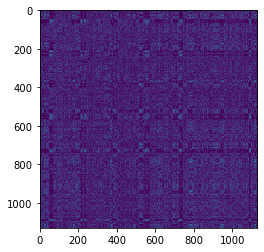

In [16]:
hs.adjustingtheta(1)
Weuclid = hs.euclidweight
W0 = (Weuclid>0.9)*1
plt.imshow(W0)

In [17]:
hs.adjustingtheta(0.1)
Wsnow= hs.snowweight
Wtau = (Wsnow>0.975)*1

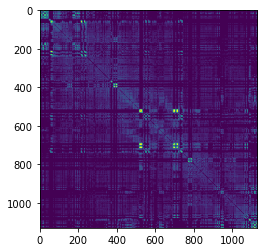

In [18]:
plt.imshow(Wtau)

In [19]:
W.sum(),W0.sum(),Wtau.sum()

(6262.0, 127016, 79670)

In [20]:
G0= graphs.Graph(W0)
G0.estimate_lmax()
Gtau= graphs.Graph(Wtau)
Gtau.estimate_lmax()

In [21]:
tau=1
k= lambda x: 1. / (1. + tau * x)
g = filters.Filter(G, k)
g0 = filters.Filter(G0, k)
gtau = filters.Filter(Gtau, k)
fdenoised = g.filter(fnosied)
fdenoised0 = g0.filter(fnosied)
fdenoisedtau = gtau.filter(fnosied)

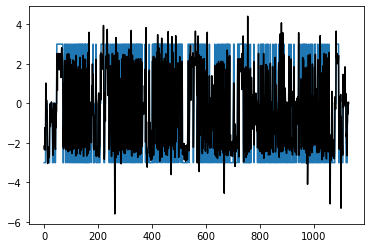

In [22]:
plt.plot(ftrue)
#plt.plot(fdenoised,'-r')
plt.plot(fdenoised0,'-k')
#plt.plot(fdenoisedtau,'-b')

### 시뮬

In [23]:
np.sum((ftrue-fdenoised)**2), np.sum((ftrue-fdenoised0)**2), np.sum((ftrue-fdenoisedtau)**2)

(215.84261617580648, 968.0581842929915, 97.30987919895034)

### 시각화

<Figure size 432x288 with 0 Axes>

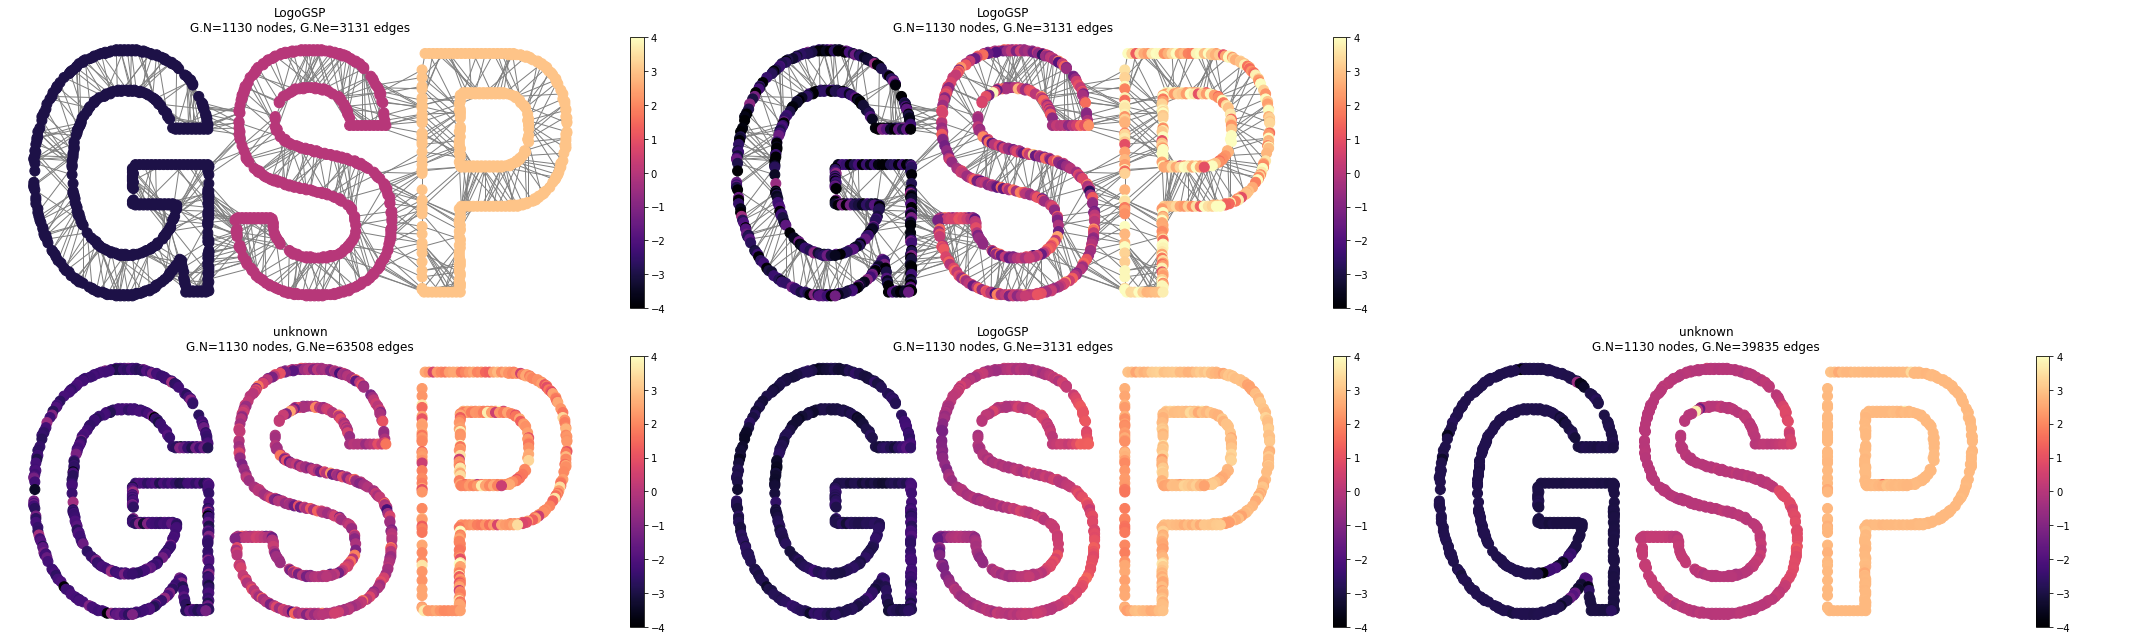

In [24]:
plt.magma()
fig, ax = plt.subplots(2,3, figsize=(30,9))
G0.set_coordinates(G.coords)
Gtau.set_coordinates(G.coords)
G.plot_signal(ftrue, ax = ax[0][0],limits=[-4,4])
G.plot_signal(fnosied, ax = ax[0][1],limits=[-4,4])

G0.plot_signal(fdenoised0, ax = ax[1][0],limits=[-4,4],show_edges=False)
G.plot_signal(fdenoised, ax = ax[1][1],limits=[-4,4],show_edges=False)
Gtau.plot_signal(fdenoisedtau, ax = ax[1][2],limits=[-4,4],show_edges=False)

ax[0][0].set_axis_off()
ax[0][1].set_axis_off()
ax[0][2].set_axis_off()
ax[1][0].set_axis_off()
ax[1][1].set_axis_off()
ax[1][2].set_axis_off()

fig.tight_layout()